In [21]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import numpy as np

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

In [8]:
image = Image.open("bird_dataset_small/train_images/004.Groove_billed_Ani/Groove_Billed_Ani_0018_1613.jpg")

In [9]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  


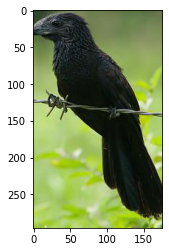

In [10]:
# plot the input 
import matplotlib.pyplot as plt
plt.imshow(np.array(image))
plt.show()

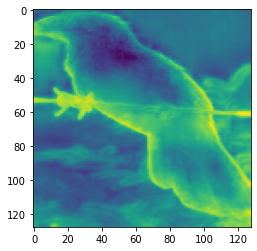

In [13]:
# print(inputs.shape)
plt.imshow(outputs.logits[0, 12,...].to('cpu').detach().numpy())
plt.show()

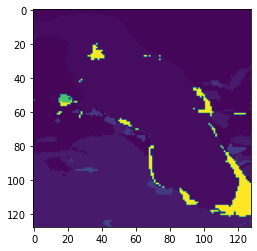

In [14]:
# print(inputs.shape)
plt.imshow(outputs.logits.argmax(1)[0].to('cpu').numpy()/149.)
plt.show()

In [78]:
outputs.logits.argmax(1)[0][80, 60]

tensor(13)

In [22]:
from transformers import AutoModelForSemanticSegmentation
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# feature_extractor = AutoImageProcessor.from_pretrained("google/deeplabv3_mobilenet_v2_1.0_513")
model = AutoModelForSemanticSegmentation.from_pretrained("google/deeplabv3_mobilenet_v2_1.0_513")

inputs = feature_extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
predicted_mask = feature_extractor.post_process_semantic_segmentation(outputs)

KeyError: 'mobilenet_v2'